# <center>Homework 3</center>
### <center>_Tanner S Eastmond_</center>

## Surviving the Titanic

What differentiated people who survived or did not survive the Titanic disaster? This has been on the question of many amateur and even professional historians. In connection with the Kaggle competition [Titanic: Machine Learning from Disaster](https://www.kaggle.com/c/titanic), we will explore what characteristics differentiated whether or not a person on the Titanic survived or not.

In [2]:
# Import the packages we need.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random

from sklearn.linear_model import SGDRegressor, LogisticRegression, ElasticNetCV, LassoCV
from sklearn.metrics import mean_squared_error, accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.feature_selection import SelectFromModel

%matplotlib inline

## Data Description and Cleaning

In [4]:
# Read in the data and get a first look.
df = pd.read_csv('train_titanic.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Let's first learn a little bit about our "Survived" variable.

In [7]:
# See how many are in each class.
df.Survived.value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [15]:
# Print out variables by class.
pd.pivot_table(df, values=['Age', 'SibSp', 'Parch', 'Fare'], index=['Sex', 'Pclass'], columns=['Survived']).round(decimals=2)

Age           Fare         Parch       SibSp      
Survived           0      1       0       1     0     1     0     1
Sex    Pclass                                                      
female 1       25.67  34.94  110.60  105.98  1.33  0.43  0.67  0.55
       2       36.00  28.08   18.25   22.29  0.17  0.64  0.50  0.49
       3       23.82  19.33   19.77   12.46  1.10  0.50  1.29  0.50
male   1       44.58  36.25   62.89   74.64  0.26  0.31  0.27  0.38
       2       33.37  16.02   19.49   21.10  0.14  0.65  0.31  0.53
       3       27.26  22.27   12.20   15.58  0.21  0.30  0.52  0.34

Interesting. In every case with age, younger people survived, except for first-class female passengers, of whom older women generally survived. Fare doesn't necessarily show a pattern for women, but for men, those who survived paid more on average for tickets. Also we do not necessarily observe a strong pattern for number of parents/children or siblings/spouses using this approach.

### _Categorical Variables_

Now we need to examine our categorical variables with the survived variable.

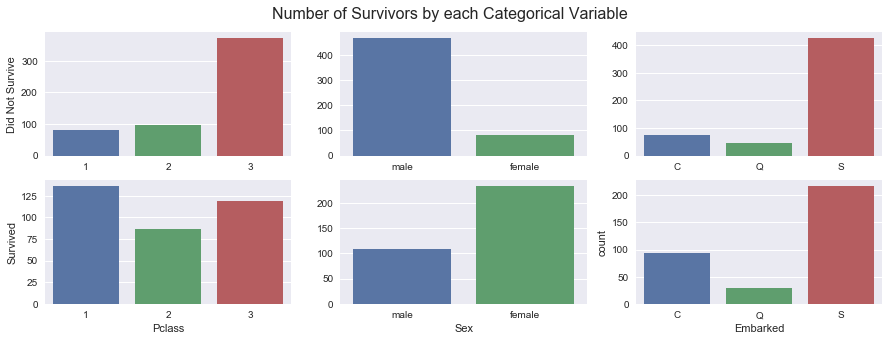

In [32]:
# Make a count plot for each.
# Initialize the plot.
fig, axes = plt.subplots(2, 3, figsize=(15,5))

# Title the plot.
fig.suptitle('Number of Survivors by each Categorical Variable', fontsize=16, y=.95)

# Make the plots.
sns.countplot(x='Pclass', data=df.loc[df.Survived == 0], order=[1, 2, 3], ax=axes.flatten()[0])
sns.countplot(x='Sex', data=df.loc[df.Survived == 0], order=['male', 'female'], ax=axes.flatten()[1])
sns.countplot(x='Embarked', data=df.loc[df.Survived == 0], order=['C', 'Q', 'S'], ax=axes.flatten()[2])

sns.countplot(x='Pclass', data=df.loc[df.Survived == 1], order=[1, 2, 3], ax=axes.flatten()[3])
sns.countplot(x='Sex', data=df.loc[df.Survived == 1], order=['male', 'female'], ax=axes.flatten()[4])
sns.countplot(x='Embarked', data=df.loc[df.Survived == 1], order=['C', 'Q', 'S'], ax=axes.flatten()[5])

# Share the x and y axis label.
for x in range(3):
    axes.flatten()[x].set_xlabel('')
    
for x in [1, 2, 3, 4]:
    axes.flatten()[x].set_ylabel('')

axes.flatten()[0].set_ylabel('Did Not Survive')
axes.flatten()[3].set_ylabel('Survived')

Keep track of the scale well, but we can see that more than twice as many females survived than didn't or than males, and most males did not survive. Also, a higher proportion of first class passengers survived than the other classes. The pattern is not super clear for where passengers embarked.

### _Continuous Variables_

Let's take a look at the continuous variables.